In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import math


from gensim.models.word2vec import Word2Vec
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Embedding, Activation, Input, Flatten
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import PorterStemmer
from sklearn import preprocessing



from keras.layers import LSTM, Bidirectional
from keras.models import Model
from keras.callbacks import EarlyStopping

import gensim

In [2]:
df = pd.read_csv('Banglish.csv',encoding= 'unicode_escape')


print(df.Emotion.value_counts())

df.head(10)


surprise    537
happy       530
sad         515
fear        494
angry       491
disgust     477
Name: Emotion, dtype: int64


,Unnamed: 0,Emotion,text
0,4615,surprise,varoter senaprdhan pac diner sfre dhakay
1,6145,happy,alhamdulillahhhmi police vaiyader bolchi tara ...
2,5060,happy,prithibite bangladesher mukh
3,3115,angry,motrsaikel seba calu ba bikolpo kormosngsthane...
4,6966,fear,ete ekdike sthaniy basindader swasthzjhuki bar...
5,484,disgust,bzaparta kharap hobena dese trun smajer bisal...
6,6166,surprise,sekh hasina to boleche kumillar manush valo ho...
7,6408,angry,beyadb sob bysei keyadb
8,663,surprise,dliy lok dwara bzangk lutpater arekti chitro
9,5854,happy,rajnoitik hanahanir ceye emon khbr prte valo l...


In [3]:
df.head

<bound method NDFrame.head of       Unnamed: 0   Emotion                                               text
0           4615  surprise           varoter senaprdhan pac diner sfre dhakay
1           6145     happy  alhamdulillahhhmi police vaiyader bolchi tara ...
2           5060     happy                       prithibite bangladesher mukh
3           3115     angry  motrsaikel seba calu ba bikolpo kormosngsthane...
4           6966      fear  ete ekdike sthaniy basindader swasthzjhuki bar...
...          ...       ...                                                ...
3039         415  surprise  mmotoa bndzopadhzayke abar sokj kore agamikal ...
3040        7349  surprise                               vai amra ki manush ?
3041        2415  surprise                         ke bllo BNP kharap ache ??
3042         905   disgust                    sorkari ejentder ninmmaner natk
3043        5367       sad                vai eida deikha kichu lage na? ????

[3044 rows x 3 columns]>

In [4]:
df.groupby("Emotion").describe()

Unnamed: 0                                                           \
              count         mean          std   min      25%     50%     75%   
Emotion                                                                        
angry         491.0  3979.902240  2252.819613   3.0  2010.50  4022.0  6112.0   
disgust       477.0  4025.656184  2234.550677   2.0  2197.00  4193.0  5974.0   
fear          494.0  3768.599190  2223.243660  17.0  1816.00  3649.0  5680.0   
happy         530.0  3783.216981  2238.278699  38.0  1818.75  3732.5  5763.5   
sad           515.0  3641.378641  2164.471590   0.0  1799.50  3524.0  5481.5   
surprise      537.0  3798.471136  2150.175036   8.0  1935.00  3798.0  5528.0   

                  
             max  
Emotion           
angry     7610.0  
disgust   7604.0  
fear      7566.0  
happy     7599.0  
sad       7601.0  
surprise  7605.0

In [5]:
df.drop(labels='Unnamed: 0', axis=1)

,Emotion,text
0,surprise,varoter senaprdhan pac diner sfre dhakay
1,happy,alhamdulillahhhmi police vaiyader bolchi tara ...
2,happy,prithibite bangladesher mukh
3,angry,motrsaikel seba calu ba bikolpo kormosngsthane...
4,fear,ete ekdike sthaniy basindader swasthzjhuki bar...
...,...,...
3039,surprise,mmotoa bndzopadhzayke abar sokj kore agamikal ...
3040,surprise,vai amra ki manush ?
3041,surprise,ke bllo BNP kharap ache ??
3042,disgust,sorkari ejentder ninmmaner natk


In [6]:
df.head

<bound method NDFrame.head of       Unnamed: 0   Emotion                                               text
0           4615  surprise           varoter senaprdhan pac diner sfre dhakay
1           6145     happy  alhamdulillahhhmi police vaiyader bolchi tara ...
2           5060     happy                       prithibite bangladesher mukh
3           3115     angry  motrsaikel seba calu ba bikolpo kormosngsthane...
4           6966      fear  ete ekdike sthaniy basindader swasthzjhuki bar...
...          ...       ...                                                ...
3039         415  surprise  mmotoa bndzopadhzayke abar sokj kore agamikal ...
3040        7349  surprise                               vai amra ki manush ?
3041        2415  surprise                         ke bllo BNP kharap ache ??
3042         905   disgust                    sorkari ejentder ninmmaner natk
3043        5367       sad                vai eida deikha kichu lage na? ????

[3044 rows x 3 columns]>

In [7]:
df.isnull()

,Unnamed: 0,Emotion,text
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
3039,False,False,False
3040,False,False,False
3041,False,False,False
3042,False,False,False


In [8]:
df.dropna(inplace=True)

In [9]:
text = df['text'].values.tolist()

In [10]:
df.groupby("Emotion").describe()

Unnamed: 0                                                           \
              count         mean          std   min      25%     50%     75%   
Emotion                                                                        
angry         491.0  3979.902240  2252.819613   3.0  2010.50  4022.0  6112.0   
disgust       477.0  4025.656184  2234.550677   2.0  2197.00  4193.0  5974.0   
fear          494.0  3768.599190  2223.243660  17.0  1816.00  3649.0  5680.0   
happy         530.0  3783.216981  2238.278699  38.0  1818.75  3732.5  5763.5   
sad           515.0  3641.378641  2164.471590   0.0  1799.50  3524.0  5481.5   
surprise      537.0  3798.471136  2150.175036   8.0  1935.00  3798.0  5528.0   

                  
             max  
Emotion           
angry     7610.0  
disgust   7604.0  
fear      7566.0  
happy     7599.0  
sad       7601.0  
surprise  7605.0

In [11]:
df["Emotion"].value_counts()

surprise    537
happy       530
sad         515
fear        494
angry       491
disgust     477
Name: Emotion, dtype: int64

C:\Users\moshi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


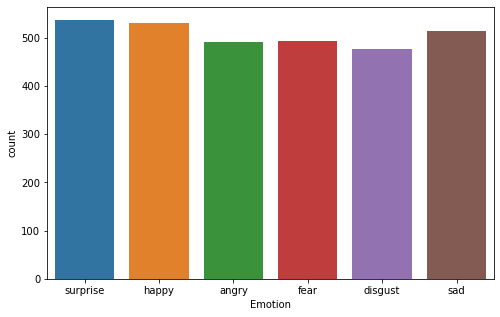

In [12]:
plt.subplots(figsize=(8,5))
sns.countplot(df["Emotion"])
plt.show()

In [13]:
longest_string = max(df["text"], key=len)
print(len(longest_string))

654


In [14]:
print("data shape", df.shape)

data shape (3044, 3)


In [15]:
df.describe

<bound method NDFrame.describe of       Unnamed: 0   Emotion                                               text
0           4615  surprise           varoter senaprdhan pac diner sfre dhakay
1           6145     happy  alhamdulillahhhmi police vaiyader bolchi tara ...
2           5060     happy                       prithibite bangladesher mukh
3           3115     angry  motrsaikel seba calu ba bikolpo kormosngsthane...
4           6966      fear  ete ekdike sthaniy basindader swasthzjhuki bar...
...          ...       ...                                                ...
3039         415  surprise  mmotoa bndzopadhzayke abar sokj kore agamikal ...
3040        7349  surprise                               vai amra ki manush ?
3041        2415  surprise                         ke bllo BNP kharap ache ??
3042         905   disgust                    sorkari ejentder ninmmaner natk
3043        5367       sad                vai eida deikha kichu lage na? ????

[3044 rows x 3 columns]>

In [16]:
Emotion_Class=df.Emotion.unique()
dic={}
for i,Emotion in enumerate(Emotion_Class):
    dic[Emotion]=i
labels=df.Emotion.apply(lambda x:dic[x])
print(labels)

0       0
1       1
2       1
3       2
4       3
       ..
3039    0
3040    0
3041    0
3042    4
3043    5
Name: Emotion, Length: 3044, dtype: int64


In [17]:
val_data=df.sample(frac=0.2,random_state=200)
train_data=df.drop(val_data.index)

In [18]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

In [19]:
texts=train_data.text

In [20]:
NUM_WORDS=20000
tokenizer = Tokenizer(num_words=NUM_WORDS,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n\'',
                      lower=True)
tokenizer.fit_on_texts(texts)
sequences_train = tokenizer.texts_to_sequences(texts)
sequences_valid=tokenizer.texts_to_sequences(val_data.text)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 7689 unique tokens.


In [21]:
X_train = pad_sequences(sequences_train)
X_val = pad_sequences(sequences_valid,maxlen=X_train.shape[1])
y_train = to_categorical(np.asarray(labels[train_data.index]))
y_val = to_categorical(np.asarray(labels[val_data.index]))
print('Shape of X train and X validation tensor:', X_train.shape,X_val.shape)
print('Shape of label train and validation tensor:', y_train.shape,y_val.shape)

Shape of X train and X validation tensor: (2435, 114) (609, 114)
Shape of label train and validation tensor: (2435, 6) (609, 6)


In [22]:
import gensim
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess

from gensim.models.keyedvectors import KeyedVectors

word_vectors = KeyedVectors.load_word2vec_format('C:/Users/moshi/Python Code/Vietnam and Indonesia/GoogleNews-vectors-negative300.bin', binary=True)

EMBEDDING_DIM=300
vocabulary_size=min(len(word_index)+1,NUM_WORDS)
embedding_matrix = np.zeros((vocabulary_size, EMBEDDING_DIM))
for word, i in word_index.items():
    if i>=NUM_WORDS:
        continue
    try:
        embedding_vector = word_vectors[word]
        embedding_matrix[i] = embedding_vector
    except KeyError:
        embedding_matrix[i]=np.random.normal(0,np.sqrt(0.25),EMBEDDING_DIM)

del(word_vectors)
print(embedding_matrix.shape)

from keras.layers import Embedding
embedding_layer = Embedding(vocabulary_size,
                            EMBEDDING_DIM,
                            weights=[embedding_matrix],
                            trainable=True)

(7690, 300)


In [23]:
from keras.layers import Embedding
EMBEDDING_DIM=300
vocabulary_size=min(len(word_index)+1,NUM_WORDS)

embedding_layer = Embedding(vocabulary_size,
                            EMBEDDING_DIM)

In [24]:
from keras.layers import Dense, Input, GlobalMaxPooling1D
from keras.layers import Conv1D, MaxPooling1D, Embedding
from keras.models import Model
from keras.layers import Input, Dense, Embedding, Conv2D, MaxPooling2D, Dropout,concatenate
from keras.layers.core import Reshape, Flatten
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from keras.models import Model
from keras import regularizers
sequence_length = X_train.shape[1]
filter_sizes = [3,4,5]
num_filters = 100
drop = 0.5

In [25]:
inputs = Input(shape=(sequence_length,))
embedding = embedding_layer(inputs)
reshape = Reshape((sequence_length,EMBEDDING_DIM,1))(embedding)

conv_0 = Conv2D(num_filters, (filter_sizes[0], EMBEDDING_DIM),activation='relu',kernel_regularizer=regularizers.l2(0.01))(reshape)
conv_1 = Conv2D(num_filters, (filter_sizes[1], EMBEDDING_DIM),activation='relu',kernel_regularizer=regularizers.l2(0.01))(reshape)
conv_2 = Conv2D(num_filters, (filter_sizes[2], EMBEDDING_DIM),activation='relu',kernel_regularizer=regularizers.l2(0.01))(reshape)

maxpool_0 = MaxPooling2D((sequence_length - filter_sizes[0] + 1, 1), strides=(1,1))(conv_0)
maxpool_1 = MaxPooling2D((sequence_length - filter_sizes[1] + 1, 1), strides=(1,1))(conv_1)
maxpool_2 = MaxPooling2D((sequence_length - filter_sizes[2] + 1, 1), strides=(1,1))(conv_2)

merged_tensor = concatenate([maxpool_0, maxpool_1, maxpool_2], axis=1)
flatten = Flatten()(merged_tensor)
reshape = Reshape((3*num_filters,))(flatten)
dropout = Dropout(drop)(flatten)
output = Dense(units=6, activation='softmax',kernel_regularizer=regularizers.l2(0.01))(dropout)

# this creates a model that includes
model = Model(inputs, output)

In [26]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 114)]        0           []                               
                                                                                                  
 embedding_1 (Embedding)        (None, 114, 300)     2307000     ['input_1[0][0]']                
                                                                                                  
 reshape (Reshape)              (None, 114, 300, 1)  0           ['embedding_1[0][0]']            
                                                                                                  
 conv2d (Conv2D)                (None, 112, 1, 100)  90100       ['reshape[0][0]']                
                                                                                              

In [29]:
history = model.fit(X_train, y_train, epochs=20,verbose=1, validation_data=(X_val, y_val), batch_size=64) 
loss, accuracy = model.evaluate(X_train, y_train, verbose=0)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_val, y_val, verbose=0)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Epoch 1/20
39/39 [==============================] - 8s 175ms/step - loss: 1.9137 - acc: 0.2123 - val_loss: 1.8631 - val_acc: 0.2677
Epoch 2/20
39/39 [==============================] - 7s 178ms/step - loss: 1.8369 - acc: 0.3639 - val_loss: 1.8182 - val_acc: 0.3612
Epoch 3/20
39/39 [==============================] - 7s 181ms/step - loss: 1.7700 - acc: 0.5331 - val_loss: 1.7663 - val_acc: 0.4368
Epoch 4/20
39/39 [==============================] - 7s 175ms/step - loss: 1.5770 - acc: 0.6476 - val_loss: 1.7503 - val_acc: 0.4565
Epoch 5/20
39/39 [==============================] - 7s 177ms/step - loss: 1.3048 - acc: 0.7634 - val_loss: 1.7505 - val_acc: 0.4811
Epoch 6/20
39/39 [==============================] - 7s 179ms/step - loss: 1.0682 - acc: 0.8678 - val_loss: 1.7821 - val_acc: 0.4877
Epoch 7/20
39/39 [==============================] - 7s 182ms/step - loss: 0.9177 - acc: 0.9121 - val_loss: 1.8158 - val_acc: 0.4943
Epoch 8/20
39/39 [==============================] - 7s 179ms/step - loss: 0.

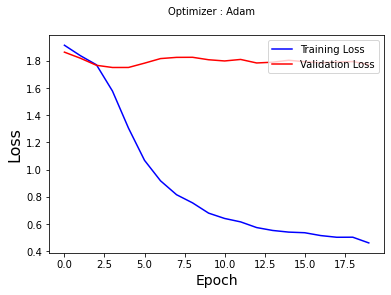

In [30]:
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.xlabel('Epoch', fontsize=14)
plt.plot(history.history['loss'], color='b', label='Training Loss')
plt.plot(history.history['val_loss'], color='r', label='Validation Loss')
plt.legend(loc='upper right')